# Programming a Deep Neural Network with Flux

## MNIST Data Set

The MNIST data set consists of 70,000 images of hand written digits, 60,000 of which are typically used as labeled training examples and the other 10,000 used for testing your learning model on. The following picture represent a sample of some of the images.

<img src="MnistExamples.png" alt="Drawing" style="width: 500px;"/>

We can load this dataset with the ```MLDatasets.jl``` package. Load this data by running the following code.


---

In [2]:
using MLDatasets, Flux
using Plots, Images

# load full training set
train_x, train_y = MNIST.traindata(Float32)

# load full test set
test_x,  test_y  = MNIST.testdata(Float32)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

---

Each image is comprised of a $28\times 28$ grey scaled grid of pixel values. These values are floating point numbers in the interval $(0,1)$, where darker pixels will have values closer to $1$ and lighter pixels will have values closer to $0$. The following image represents one such example. 

<img src="MNIST-Matrix.png" alt="Drawing" style="width: 600px;"/>

We can view the image of one of these matrices by running the following code.

---

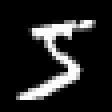

In [3]:
# Images.colorview
colorview(Gray, train_x[:, :, 1]')

---

Tensors are simply multi-dimensional matrices. The data structures ```train_x``` and ```test_x``` are stored as 3 dimensional tensors. 

<img src="order-3-tensor.png" alt="Drawing" style="width: 300px;"/>

This can be varified by viewing the size of these variables. 


---

In [ ]:
# Show the dimensions of the data 
@show size(train_x)
@show size(train_y)
println()
@show size(test_x)
@show size(test_y)
println()

---

## Image Flattening

Simple **dense neural networks** take as input feature vectors which are column vectors. In order to feed our images into such a network we must **flatten** the matrix into a column vector.

<img src="flatten.png" alt="Drawing" style="width: 500px;"/>

We can do this for each image matrix we are considering by calling the ```Flux.flatten()```. Note, that $784 = 28 \times 28$. By running the following code we reshape our images and store them in new variables. 

## One-Hot Encoding 

<img src="onehot.jpeg" alt="Drawing" style="width: 500px;"/>

## Row Features and Column Instances 
Unlike most Python machine learning API's, Flux.jl and other Julia machine learning API's, we will store our training and testing data with feature measurements in the rows of our arrays and columns being instances. In the case of our 3-dimensional tensor, the 3rd dimension represents the number of instances of our data, i.e., the number of digits . 

---

In [5]:
# Grab the dimensions of train_x
(m, n, z) = size(train_x)

# Reshape Data in order to flatten each image into a linear array
xtrain = Flux.flatten(train_x)
xtest = Flux.flatten(test_x)

# One-hot-encode the labels
ytrain, ytest = Flux.onehotbatch(train_y, 0:9), Flux.onehotbatch(test_y, 0:9)

# Print the dimensions of training feature matrices and training label matrices
println("xtrain dimensions = $(size(xtrain))")
println("ytrain dimensions = $(size(ytrain))")


xtrain dimensions = (784, 60000)
ytrain dimensions = (10, 60000)


In [6]:
# Chain together functions!
model = Flux.Chain(
                    Dense(m*n, 60, Flux.σ),
                    Dense(60, 60, Flux.σ),
                    Dense(60, 60, Flux.σ),
                    Dense(60, 10, Flux.σ),
                )

# Define mean squared error loss function
loss(x, y) = Flux.Losses.mse(model(x), y)

# ADAM would be the perferred optimizer for serious deep learning
#opt = Flux.ADAM()

# Define gradient descent optimizer
# Flux.Descent
opt = Descent(0.23)

# Format your data
data = [(xtrain, ytrain)]

# Collect weights and bias for your model
parameters = Flux.params(model)

println("Old Loss = $(loss(xtrain, ytrain))")

# Train the model over one epoch
Flux.train!(loss, parameters, data, opt)

println("New Loss = $(loss(xtrain, ytrain))")

Old Loss = 0.26421174
New Loss = 0.24850085


In [7]:
#using Flux: @epochs

println("Old Loss = $(loss(xtrain, ytrain)) \n")

(m, n) = size(xtrain)

# Train the model over 100 epochs
for epoch in 1:100_000
    # Randomly select a entry of training data 
    i = rand(1:n)
    data = [(xtrain[:, i], ytrain[:, i])]

    # Implement Stochastic Gradient Descent 
    Flux.train!(loss, parameters, data, opt)

    # Print loss function values 
    if epoch % 10_000 == 0
        println("Epoch: $(epoch)")
        @show loss(xtrain, ytrain)
        println()
    end
end


Old Loss = 0.24850085 

Epoch: 10000
loss(xtrain, ytrain) = 0.08957974f0

Epoch: 20000
loss(xtrain, ytrain) = 0.07942413f0

Epoch: 30000
loss(xtrain, ytrain) = 0.04997554f0

Epoch: 40000
loss(xtrain, ytrain) = 0.03696692f0

Epoch: 50000
loss(xtrain, ytrain) = 0.027283082f0

Epoch: 60000
loss(xtrain, ytrain) = 0.021008704f0

Epoch: 70000
loss(xtrain, ytrain) = 0.017017126f0

Epoch: 80000
loss(xtrain, ytrain) = 0.0151008135f0

Epoch: 90000
loss(xtrain, ytrain) = 0.013939789f0

Epoch: 100000
loss(xtrain, ytrain) = 0.013357032f0



Predict digit: 3
3


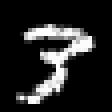

In [8]:
i = rand(1:1_000)

predict(i) = argmax(model(xtest[:, i])) - 1

digit = predict(i)
println("Predict digit: $(digit)")
println(argmax(ytest[:, i]) - 1)

colorview(Gray, test_x[:,:,i]')

Predict digit: 6
6


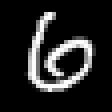

In [9]:
i = rand(1:1_000)

predict(i) = argmax(model(xtest[:, i])) - 1

digit = predict(i)
println("Predict digit: $(digit)")
println(argmax(ytest[:, i]) - 1)

colorview(Gray, test_x[:,:,i]')